In [137]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

1. Linear Regression

In [138]:
data = np.loadtxt('ex1data1.txt', usecols=(0, 1), delimiter=',')

In [139]:
x = data[:, 0]
y = data[: ,1]
m = len(y)

Text(0.5, 0, 'Population of City in 10,000s')

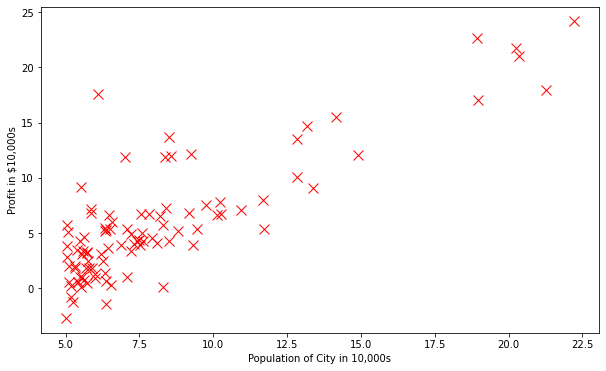

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'rx', markersize =10)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

2. Gradient Decent

In [141]:
# add a columns of ones to X
x1 = np.column_stack((np.ones(97), x))
y1 = y.reshape(97, 1)

In [142]:
y1.shape

(97, 1)

In [143]:
theta = np.zeros((2, 1)) # initializing fitting parameter
theta.shape

(2, 1)

In [144]:
iterations = 1500
alpha = 0.01

In [145]:
def computeCost(theta, x, y):
    '''
    Assume theta is n dimensional vector
    X has m rows and n columns
    y has m rows and 1 column 
    '''
    return (1/(2*m))*np.dot((np.dot(x, theta) - y).T, (np.dot(x, theta)-y))[0][0]

In [146]:
# initial loss is 32.0727
print(computeCost(theta, x1, y1))

32.072733877455676


In [147]:
def GradientDecent(x, y, initial_theta, alpha, iterations):
    m = len(y)
    theta0_history = []
    theta1_history = []
    loss_history = []
    theta = initial_theta
    L = 0
    for i in range(iterations):
        L = computeCost(theta, x, y)
        theta0_history.append(theta[0][0])
        theta1_history.append(theta[1][0])
        loss_history.append(L)
        theta = theta - alpha/m*np.dot(x.T, (np.dot(x, theta) - y))
    return theta,  L, theta0_history, theta1_history, loss_history



In [148]:
final_theta, final_Loss, theta0_history, theta1_history, loss_history = GradientDecent(x1, y1, theta, alpha, iterations)
print(f'Final Theta: {final_theta}')
print(f'Final Loss: {final_Loss}')

Final Theta: [[-3.63029144]
 [ 1.16636235]]
Final Loss: 4.483411453374869


Text(0, 0.5, 'Loss')

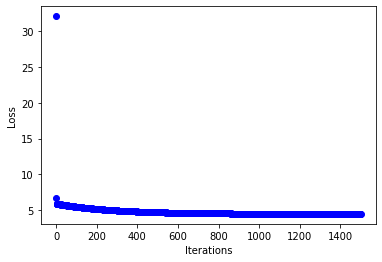

In [149]:
plt.Figure(figsize=(10, 6))
plt.plot(range(iterations), loss_history, 'bo')
plt.xlabel('Iterations')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss History')

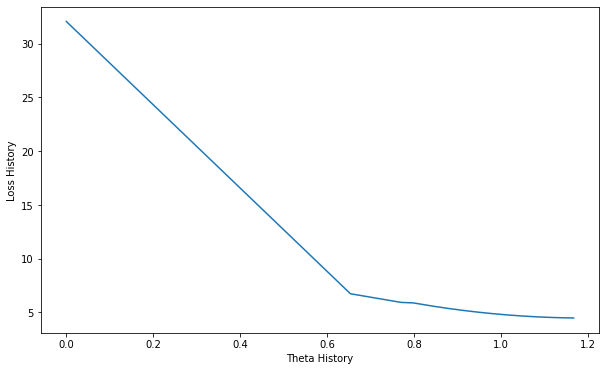

In [150]:
plt.figure(figsize=(10, 6))
plt.plot(theta1_history, loss_history)
plt.xlabel('Theta History')
plt.ylabel('Loss History')

In [151]:
y_hat = np.dot(x1, final_theta)
y_hat.reshape(1, 97)

array([[ 3.49629916,  2.81700972,  6.30548288,  4.53797737,  3.20435866,
         6.14720751,  5.08990004,  6.37488144,  3.93496804,  2.2652037 ,
         3.03045403, 12.89006489,  3.05763028,  6.17694975,  2.94880867,
         2.64403819,  3.79407147,  2.35326405,  3.86895193,  4.61682347,
         3.58844178, 20.0118734 ,  2.7731545 ,  3.74823343,  2.8603984 ,
        18.46644329, 11.33180479,  9.14954083, 11.73769889, 22.26645183,
         2.49591017,  4.05533663,  7.15646085,  3.24168226,  5.94682646,
         5.62292763,  5.81246151,  2.90868581, 11.34113569,  3.78007512,
         2.67611315,  4.39719744, 10.02547896,  3.10393486,  5.49614404,
         4.64283335,  2.28339895,  3.1362431 , 10.01614806,  2.83322216,
         5.16431395,  2.56041001,  5.02866601,  5.23767815,  3.75604805,
         3.78649011,  3.68769922,  2.94764231,  7.22877531,  7.39603168,
         6.66332285,  2.41064908, 21.18873301, 13.75783848, 18.48277236,
         4.78874528,  6.04480089,  8.30859358,  2.7

Text(0.5, 0, 'Population of City in 10,000s')

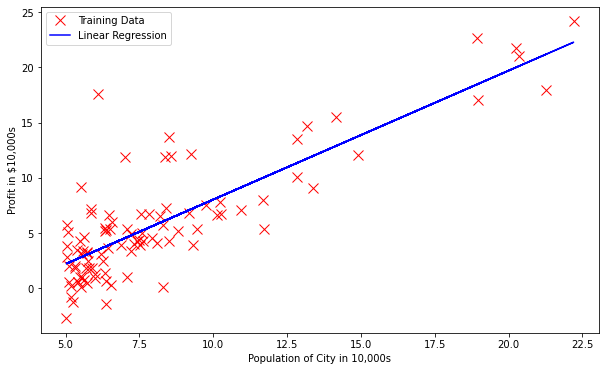

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'rx', markersize =10, label = 'Training Data')
plt.plot(x, y_hat, 'b', label = 'Linear Regression')
plt.legend()
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

3. Linear Regression with Multiple Variables

In [153]:
data2 = np.loadtxt('ex1data2.txt', usecols=(0, 1, 2), delimiter=',')

In [154]:
data2.shape

(47, 3)

In [155]:
def featureNormalize(x):
    ''' 
    m is the # of training data
    n is the # of features
    '''
    m = x.shape[0]
    n = x.shape[1]
    mean_list = []
    sd_list = []
    for i in range(n):
        features = x[:, i]
        u = np.mean(features)
        mean_list.append(u)
        sd = np.std(features)
        sd_list.append(sd)
    
    Normalized_features = np.zeros(m)
    for i in range(n):
        normalized_feature = x[:, i]
        u = mean_list[i]
        sd = sd_list[i]
        normalized_feature = (normalized_feature - u)/sd
        Normalized_features = np.column_stack((Normalized_features, normalized_feature))
    Normalized_features = Normalized_features[:, 1:]
    return mean_list, sd_list, Normalized_features


In [156]:
mean_list, sd_list, Norm_x = featureNormalize(data2)

In [157]:
print(mean_list)
print(sd_list)

[2000.6808510638298, 3.1702127659574466, 340412.6595744681]
[786.2026187430467, 0.7528428090618781, 123702.5360061474]


In [158]:
x2 = Norm_x[:, :2]
y2 = Norm_x[:, -1].reshape((len(y2), 1))

In [159]:
x2_new = np.column_stack((np.ones(data2.shape[0]), x2))
theta2 = np.zeros((x2_new.shape[1], 1))

In [160]:
# Initial loss
print(computeCost(theta=theta2, x = x2_new, y= y2))

0.24226804123711343


In [161]:
def GradientDecentMultivariate(x, y, initial_theta, alpha, iterations):
    '''
    Input:
    x, y and theta must in matrix format
    The first column of x is ones
    
    Output:
    theta in matrix format
    L is a number
    theta_history and loss_history are lists
    '''
    m = len(y)
    n = x.shape[1]
    theta_history = []
    loss_history = []
    theta = initial_theta
    L = 0
    for i in range(iterations):
        L = computeCost(theta, x, y)
        for t in theta.flat:
            theta_history.append(t)
        loss_history.append(L)
        theta = theta - alpha/m*np.dot(x.T, (np.dot(x, theta) - y))
    theta_history = np.array(theta_history).reshape((iterations, n))
    return theta,  L, theta_history, loss_history

In [162]:
final_theta2, final_Loss2, theta_history2, loss_history2 = GradientDecentMultivariate(x2_new, y2, theta2, alpha, iterations)


In [163]:
print(np.round(final_theta2, 3))
print(final_Loss2)

[[-0.   ]
 [ 0.884]
 [-0.053]]
0.06469897233621542


Text(0, 0.5, 'Loss')

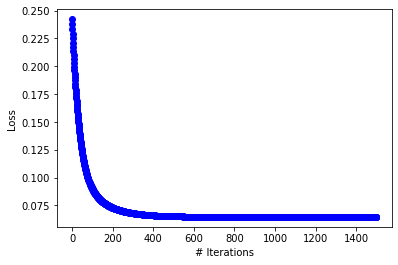

In [164]:
plt.Figure(figsize=(10, 6))
plt.plot(range(iterations), loss_history2, 'bo')
plt.xlabel('# Iterations')
plt.ylabel('Loss')

In [174]:
final_theta2.shape

(3, 1)

In [180]:
# predict the price of a house with 1650 sq feet and 3 bedrooms
nx1 = (1650 - mean_list[0])/sd_list[0]
nx2 = (3 - mean_list[1])/sd_list[1]
nx_test = np.array([1, nx1, nx2]).reshape((1, 3))
ny_test = np.dot(nx_test, final_theta2)
y_test = ny_test*sd_list[2]+mean_list[2]
print(y_test)

[[293098.56323584]]


In [193]:
# calculate y based on Normal Equation
def NormalEquation(x, y):
    return np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)

best_theta = NormalEquation(np.column_stack((np.ones(data2.shape[0]), data2[:, :2])), data2[:, -1])
y_best = np.dot([1, 1650, 3], best_theta)
print(y_best)

293081.46433489653
